In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
imgx = cv2.imread('solvay_conference.jpg')
imgy = cv2.imread('top-secret.png')
imgz = cv2.imread('ReceiptSwiss.jpg')

imgx = cv2.cvtColor(imgx, cv2.COLOR_BGR2RGB)
imgy = cv2.cvtColor(imgy, cv2.COLOR_BGR2RGB)
imgz = cv2.cvtColor(imgz, cv2.COLOR_BGR2RGB)


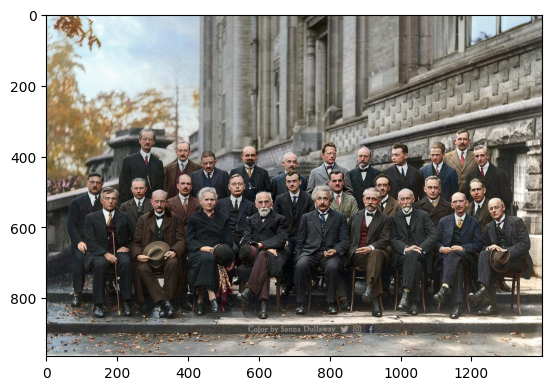

In [3]:
plt.imshow(imgx)

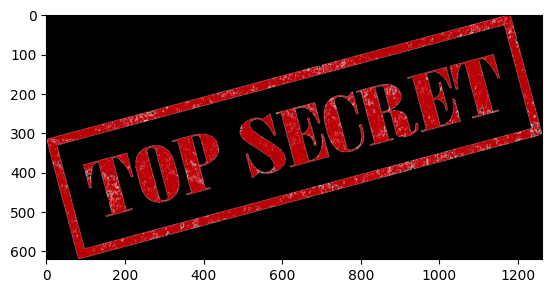

In [4]:
plt.imshow(imgy)

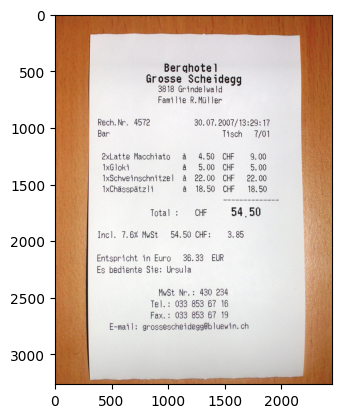

In [5]:
plt.imshow(imgz)

In [6]:
print(imgx.shape)
print(imgy.shape)

(964, 1400, 3)
(621, 1262, 3)


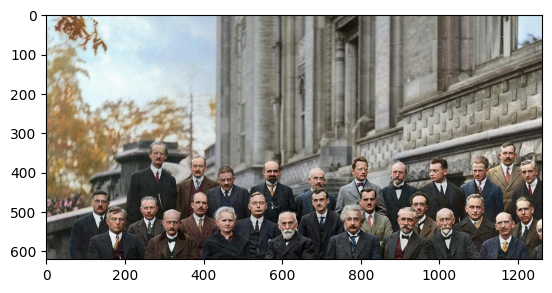

In [7]:
x_offset = 0
y_offset = 0

roi = imgx[y_offset:y_offset+imgy.shape[0],x_offset:x_offset+imgy.shape[1]]
plt.imshow(roi)

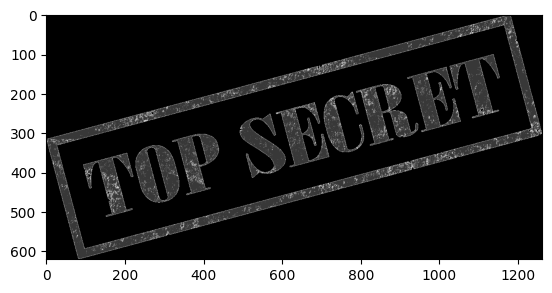

In [8]:
imgygray = cv2.cvtColor(imgy, cv2.COLOR_RGB2GRAY)
plt.imshow(imgygray, cmap='gray')

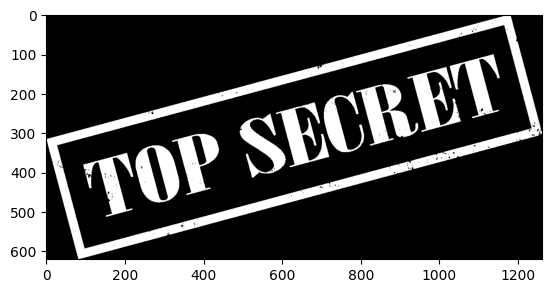

In [9]:
imgygray = cv2.cvtColor(imgy, cv2.COLOR_RGB2GRAY)
ret, imgygray = cv2.threshold(imgygray, 10, 255, cv2.THRESH_BINARY)

plt.imshow(imgygray, cmap='gray')

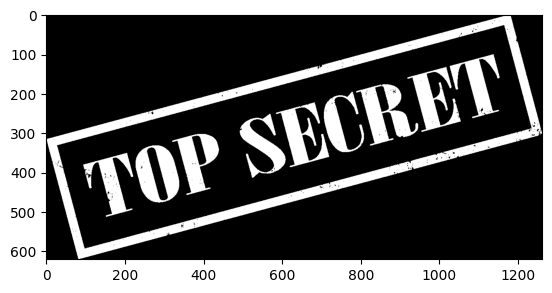

In [10]:
white_background = np.full(imgy.shape, 255, dtype=np.uint8)
bk= cv2.bitwise_or(white_background, white_background, mask=imgygray)
plt.imshow(bk)

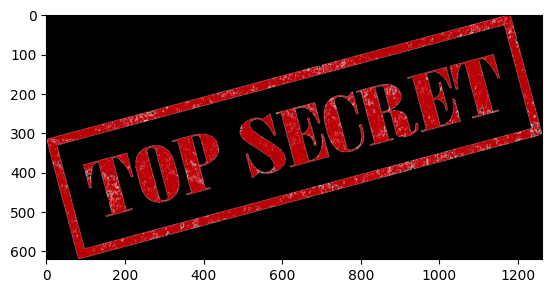

In [11]:
fg =cv2.bitwise_or(imgy, imgy, mask=imgygray)
plt.imshow(fg)

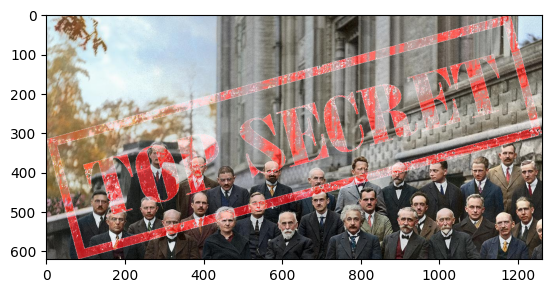

In [12]:
# Perform bitwise OR operation
final_roi = cv2.bitwise_or(fg, roi)

# Display the resulting image
plt.imshow(final_roi)
plt.show()


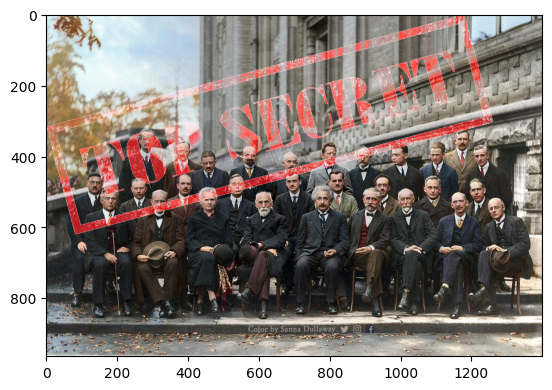

In [18]:
large_img = imgx
small_img = final_roi

large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)